# Interaction with dataset

## importing libraries

In [73]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt 
from IPython.display import display
import seaborn as sns
sns.set(style='ticks')
%matplotlib inline

## importing dataset

In [74]:
# with open('../data/pkl/dataset.pkl', 'rb') as data:
#     dataset = pickle.load(data)

In [75]:
df = pd.read_csv('../data/csv/2010to2017.csv')
df = df.set_index('index')

In [76]:
if('index' not in df.columns):
    print("right")
else:
    print('wrong')

right


## data cleaning

In [77]:
%run ../script/cleanup.py

In [78]:
# remove the nan values and add month and day columns
dataset = cleanup(df, onehot=False)

### visualizing the relationship among the features

In [36]:
# # Compute the correlation matrix
# # corr = use.drop(columns=['type','Year']).corr("pearson")
# corr = dataset.corr("pearson")
# # Generate a mask for the upper triangle 
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(15,7))

# # Generate a custom divergin colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmpa with the mask and correct aspect ration
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
#            annot=True, square=True, linewidths=.5, cbar_kws={"shrink":.5})


In [37]:
# f.savefig('corr.png')

,minTemp,maxTemp,Eto_values,DayPrecip,WindSpd,DaySolRad,rain,stage,Month,Day
minTemp,1.000000,0.307323,0.039797,-0.027325,0.164838,-0.113753,-0.501601,0.510572,0.532467,-0.021973
maxTemp,0.307323,1.000000,0.766807,-0.256217,-0.222095,0.504995,-0.440450,0.429759,0.442293,0.040906
Eto_values,0.039797,0.766807,1.000000,-0.336129,-0.007370,0.868048,-0.363081,0.207745,0.247158,0.035678
DayPrecip,-0.027325,-0.256217,-0.336129,1.000000,0.082874,-0.346063,0.164686,-0.129297,-0.136248,-0.040739
WindSpd,0.164838,-0.222095,-0.007370,0.082874,1.000000,0.090893,-0.240958,0.127878,0.201487,-0.030485
DaySolRad,-0.113753,0.504995,0.868048,-0.346063,0.090893,1.000000,-0.261939,0.088568,0.126648,0.029919
rain,-0.501601,-0.440450,-0.363081,0.164686,-0.240958,-0.261939,1.000000,-0.715242,-0.815027,0.076185
stage,0.510572,0.429759,0.207745,-0.129297,0.127878,0.088568,-0.715242,1.000000,0.901746,0.062156
Month,0.532467,0.442293,0.247158,-0.136248,0.201487,0.126648,-0.815027,0.901746,1.000000,-0.119651
Day,-0.021973,0.040906,0.035678,-0.040739,-0.030485,0.029919,0.076185,0.062156,-0.119651,1.000000


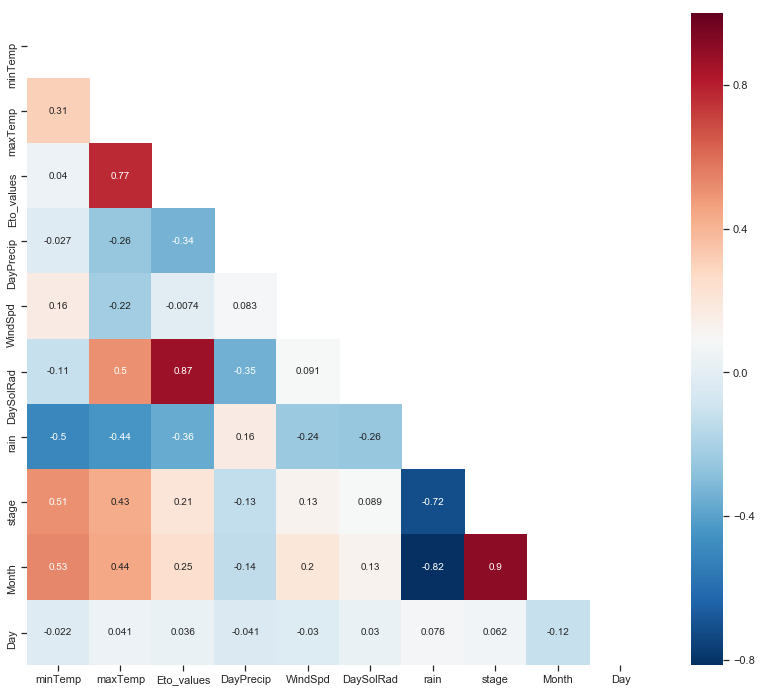

In [38]:
# to see the co-relations between features
correlation = dataset.corr()
display(correlation)
# Generate a mask for the upper triangle 
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, mask=mask, annot=True, linewidths=0, cmap="RdBu_r")
plt.savefig("../image/feature_corr.png")

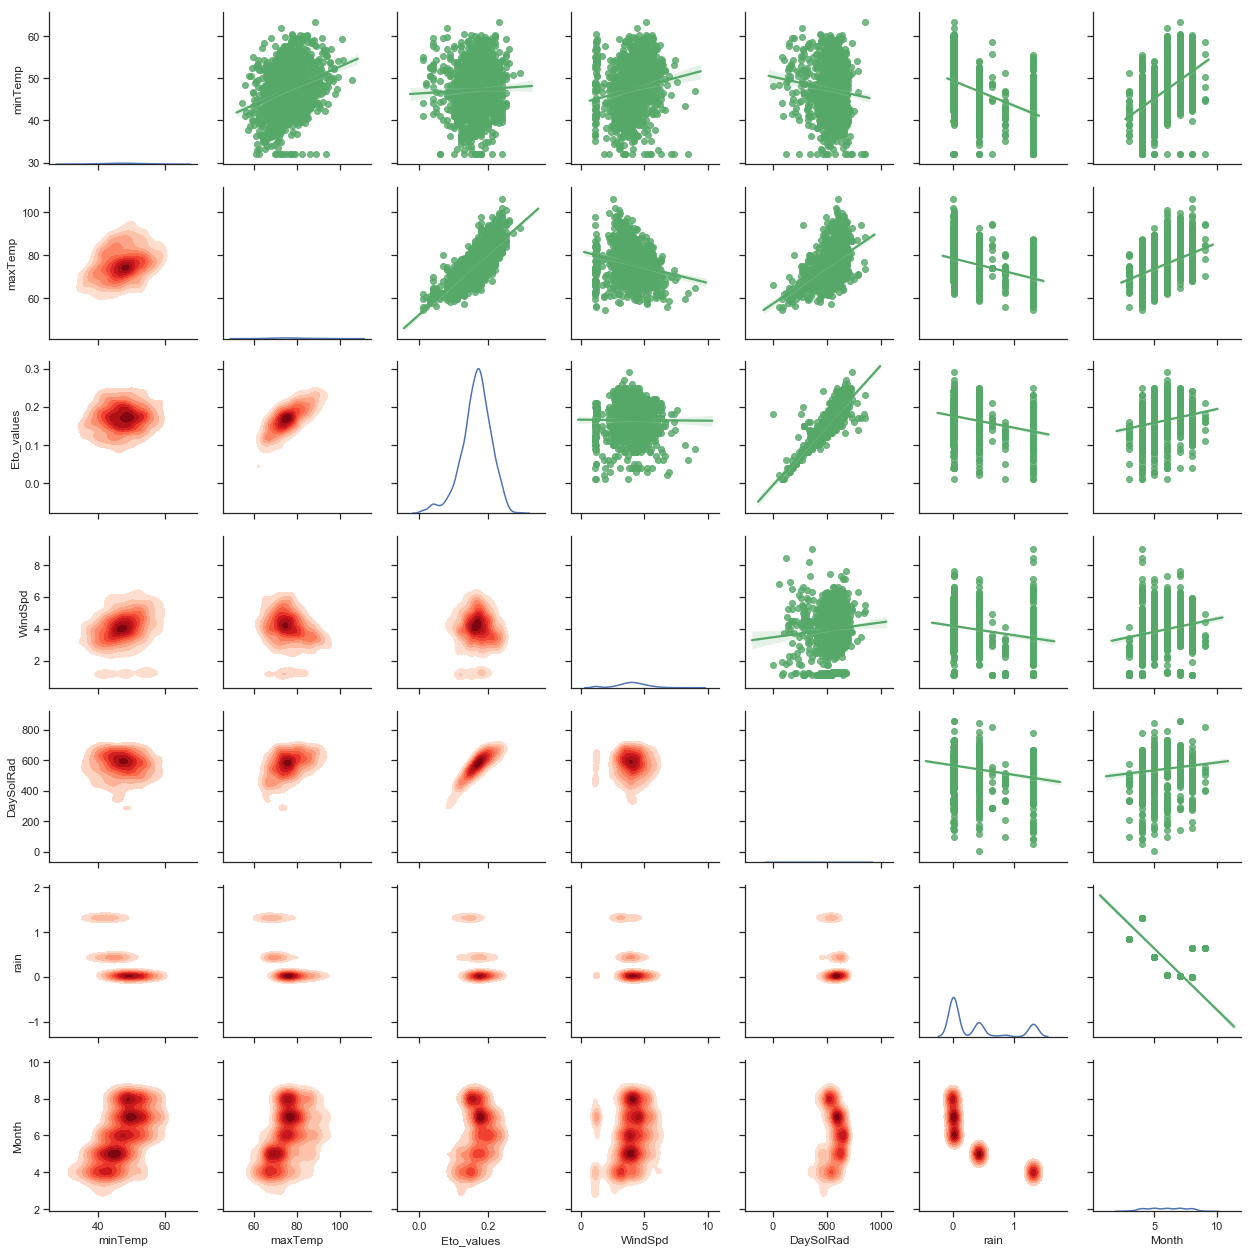

In [39]:

attributes = ["minTemp","maxTemp","Eto_values","WindSpd","DaySolRad", "rain","Month"]
g = sns.PairGrid(dataset[attributes])
g = g.map_upper(sns.regplot, color="g")
g = g.map_lower(sns.kdeplot, cmap="Reds", shade=True, shade_lowest=False)
g = g.map_diag(sns.kdeplot)

# g.savefig(fname="../image/kde.png")

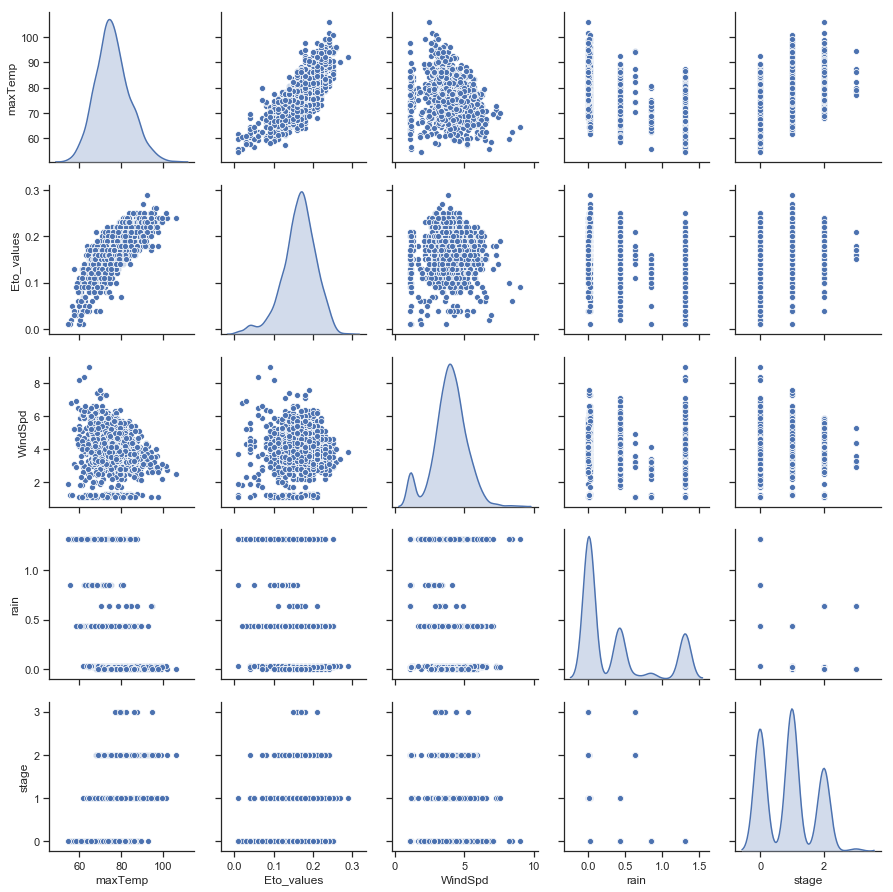

In [40]:
f=sns.pairplot(dataset[["maxTemp", "Eto_values", "WindSpd", "rain", "stage"]], diag_kind="kde")
# sns.pairplot(dataset[["minTemp", "maxTemp", "Eto_values", "WindSpd", "rain", "Bloom", "Veraison", "Harvest"]], diag_kind="kde")

f.savefig('../image/Kde_stage.png')

# Summary statistic of the features
# use.describe().T

## comparing with stages

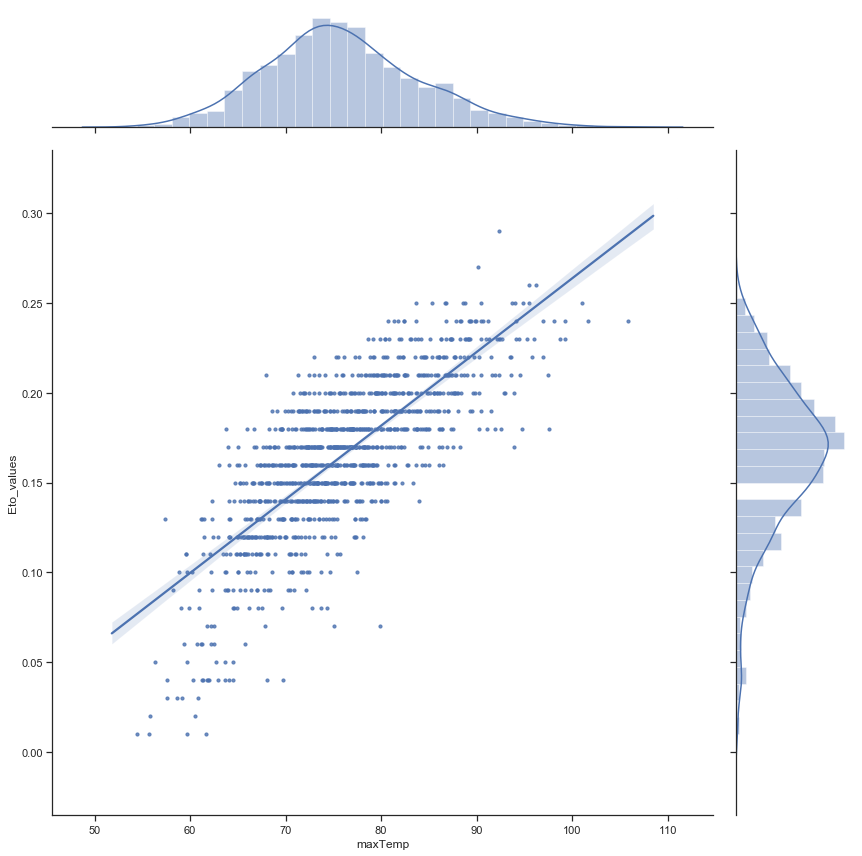

In [41]:
# Visualize the co-relation between maxTemp and Eto_values
# Create anew dataframe containing only maxTemp and Eto_values columns to visualize their co-relations
stage_Month = dataset[['maxTemp', 'Eto_values']]

# Initialize a joint-grid with the dataframe using seaborn library
gridA = sns.JointGrid(x="maxTemp", y="Eto_values", data=stage_Month, height=12)
# Draws a regression plot in the grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)
gridA.savefig('../image/maxTempvsEto.png')

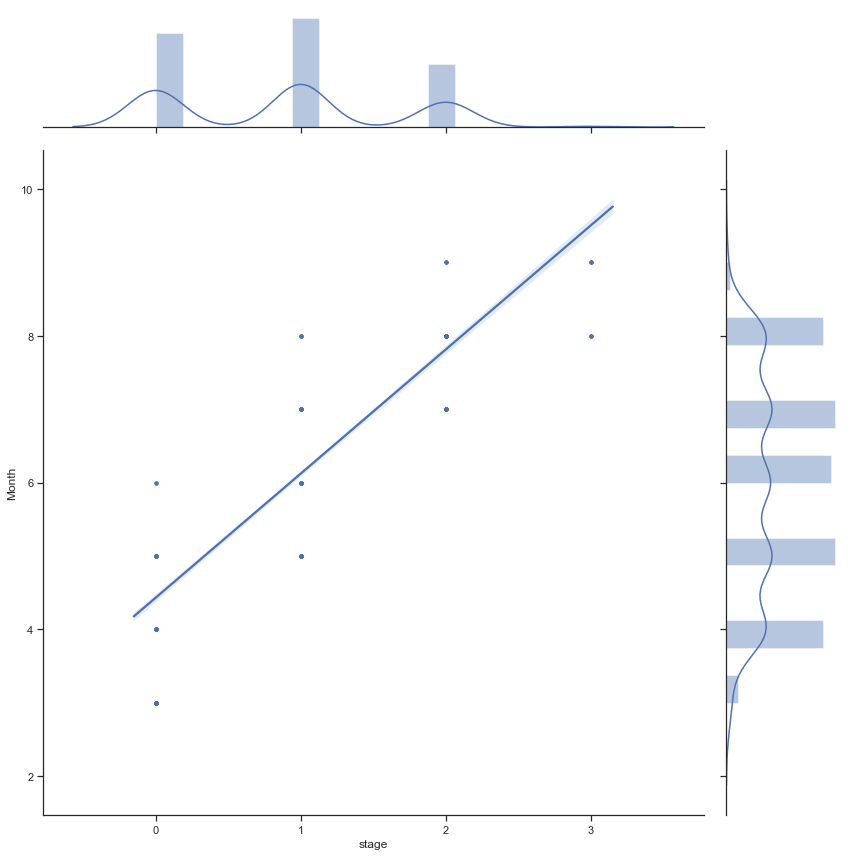

In [42]:
# Visualize the co-relation between stage and month
# Create anew dataframe containing only stage and month columns to visualize their co-relations
stage_Month = dataset[['stage', 'Month']]

# Initialize a joint-grid with the dataframe using seaborn library
gridA = sns.JointGrid(x="stage", y="Month", data=stage_Month, height=12)
# Draws a regression plot in the grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
# Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)
gridA.savefig('stagevsmonth.png')

In [43]:
# rain_month

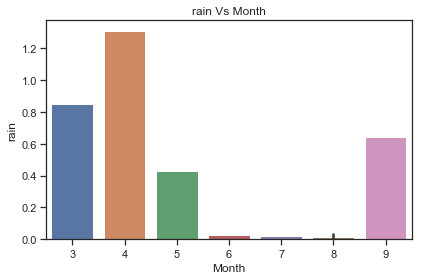

<Figure size 432x288 with 0 Axes>

In [44]:
# to Visualize relationship of discret values better with a bar plot
rain_month = dataset[['rain', 'Month']]
# fig, axs = plt.subplots(ncols=1, figsize=[10,6])
sns.barplot(x='Month', y='rain', data=rain_month)#, ax=axs)
plt.title('rain Vs Month')

plt.tight_layout()
plt.savefig('../image/rainpermonth.png')
plt.show()

plt.gcf().clear()

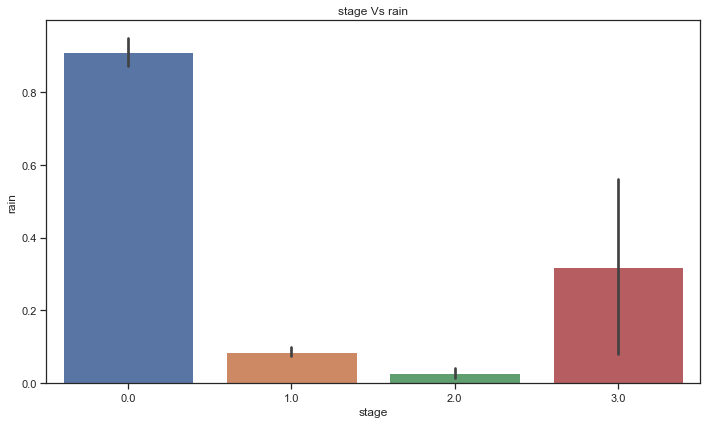

<Figure size 432x288 with 0 Axes>

In [45]:
# to Visualize relationship of discret values better with a bar plot
rain_month = dataset[['rain', 'stage']]
fig, axs = plt.subplots(ncols=1, figsize=[10,6])
sns.barplot(x='stage', y='rain', data=rain_month, ax=axs)
plt.title('stage Vs rain')

plt.tight_layout()
plt.savefig('../image/rainvsstage.png')
plt.show()
plt.gcf().clear()

## Looking for an outliers

In [99]:
# OPTIONAL: Select the indices for data points you wish to remove 
outliers = []

# For each feature find the data points with extreme high or low values 
for feature in dataset.keys():
    
    # TODO: Calculate q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(dataset[feature], q=15)
    
    # TODO: Calcuate Q3 (75th percentile of the data) for the griven feature
    Q3 = np.percentile(dataset[feature], q=95)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 2 * interquartile_range
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out = dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <=Q3+step))]
    
    # adding the index of the outliers 
    outliers.extend(out.index)
    # display(dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <=Q3+step))])
    

print(outliers)

# Remove the outliers, if any were specified
good_data = dataset.drop(dataset.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'minTemp':
Data points considered outliers for the feature 'maxTemp':
Data points considered outliers for the feature 'Eto_values':
Data points considered outliers for the feature 'DayPrecip':
Data points considered outliers for the feature 'WindSpd':
Data points considered outliers for the feature 'DaySolRad':
Data points considered outliers for the feature 'rain':
Data points considered outliers for the feature 'stage':
Data points considered outliers for the feature 'Month':
Data points considered outliers for the feature 'Day':
[5, 6, 22, 34, 155, 173, 192, 194, 195, 203, 206, 209, 210, 213, 214, 237, 310, 420, 456, 611, 632, 756, 772, 789, 790, 836, 938, 953, 1067, 1068, 1069, 1073, 1074, 1077, 1078, 1080, 1130, 1133]


In [101]:
good_data.shape

(1174, 10)

In [83]:
# it seems like the data doesn't include anykind of outline
# dataset.shape

In [93]:
test = pd.DataFrame(np.array([[1,2,3],[4,5,6]]))

In [102]:
dataset.shape

(1212, 10)